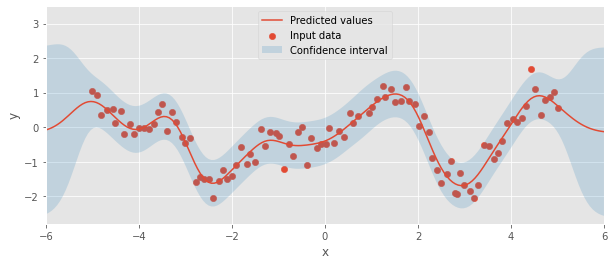

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige import OrdinaryKriging

plt.style.use("ggplot")

# fmt: off
# Data taken from
# https://blog.dominodatalab.com/fitting-gaussian-process-models-python/
X, y = np.array([
     [-5.01, 1.06], [-4.90, 0.92], [-4.82, 0.35], [-4.69, 0.49], [-4.56, 0.52],
     [-4.52, 0.12], [-4.39, 0.47], [-4.32,-0.19], [-4.19, 0.08], [-4.11,-0.19],
     [-4.00,-0.03], [-3.89,-0.03], [-3.78,-0.05], [-3.67, 0.10], [-3.59, 0.44],
     [-3.50, 0.66], [-3.39,-0.12], [-3.28, 0.45], [-3.20, 0.14], [-3.07,-0.28],
     [-3.01,-0.46], [-2.90,-0.32], [-2.77,-1.58], [-2.69,-1.44], [-2.60,-1.51],
     [-2.49,-1.50], [-2.41,-2.04], [-2.28,-1.57], [-2.19,-1.25], [-2.10,-1.50],
     [-2.00,-1.42], [-1.91,-1.10], [-1.80,-0.58], [-1.67,-1.08], [-1.61,-0.79],
     [-1.50,-1.00], [-1.37,-0.04], [-1.30,-0.54], [-1.19,-0.15], [-1.06,-0.18],
     [-0.98,-0.25], [-0.87,-1.20], [-0.78,-0.49], [-0.68,-0.83], [-0.57,-0.15],
     [-0.50, 0.00], [-0.38,-1.10], [-0.29,-0.32], [-0.18,-0.60], [-0.09,-0.49],
     [0.03 ,-0.50], [0.09 ,-0.02], [0.20 ,-0.47], [0.31 ,-0.11], [0.41 ,-0.28],
     [0.53 , 0.40], [0.61 , 0.11], [0.70 , 0.32], [0.94 , 0.42], [1.02 , 0.57],
     [1.13 , 0.82], [1.24 , 1.18], [1.30 , 0.86], [1.43 , 1.11], [1.50 , 0.74],
     [1.63 , 0.75], [1.74 , 1.15], [1.80 , 0.76], [1.93 , 0.68], [2.03 , 0.03],
     [2.12 , 0.31], [2.23 ,-0.14], [2.31 ,-0.88], [2.40 ,-1.25], [2.50 ,-1.62],
     [2.63 ,-1.37], [2.72 ,-0.99], [2.80 ,-1.92], [2.83 ,-1.94], [2.91 ,-1.32],
     [3.00 ,-1.69], [3.13 ,-1.84], [3.21 ,-2.05], [3.30 ,-1.69], [3.41 ,-0.53],
     [3.52 ,-0.55], [3.63 ,-0.92], [3.72 ,-0.76], [3.80 ,-0.41], [3.91 , 0.12],
     [4.04 , 0.25], [4.13 , 0.16], [4.24 , 0.26], [4.32 , 0.62], [4.44 , 1.69],
     [4.52 , 1.11], [4.65 , 0.36], [4.74 , 0.79], [4.84 , 0.87], [4.93 , 1.01],
     [5.02 , 0.55]
]).T
# fmt: on

X_pred = np.linspace(-6, 6, 200)

# pykrige doesn't support 1D data for now, only 2D or 3D
# adapting the 1D input to 2D
uk = OrdinaryKriging(X, np.zeros(X.shape), y, variogram_model="gaussian")

y_pred, y_std = uk.execute("grid", X_pred, np.array([0.0]))

y_pred = np.squeeze(y_pred)
y_std = np.squeeze(y_std)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.scatter(X, y, s=40, label="Input data")


ax.plot(X_pred, y_pred, label="Predicted values")
ax.fill_between(
    X_pred,
    y_pred - 3 * y_std,
    y_pred + 3 * y_std,
    alpha=0.2,
    label="Confidence interval",
)
ax.legend(loc=9)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-6, 6)
ax.set_ylim(-2.8, 3.5)
plt.show()

Example with the NTI

In [70]:
from pykrige.uk import UniversalKriging
import importlib
import positioning_sensors as ps

importlib.reload(ps)

<module 'positioning_sensors' from '/Users/rodrigo/SourceCodes/git/optimal_light_sensor_location/positioning_sensors.py'>

In [71]:
#Original nocturnal image without values <21
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)
nonsat = ps.desaturate(luminance,th=62)
W1 = ps.f5(nonsat,importance)
W2 = ps.f2(nonsat,importance)
seeds = ps.getMax(W1)
seedsc = ps.getMax(W1)

seedsc[19][17]=0
seedsc[29][13]=0
seedsc[33][18]=0
seedsc[33][20]=0
seedsc[34][35]=0
seedsc[34][36]=0
seedsc[34][33]=0
seedsc[35][34]=0

seeds = seedsc

seeds_nonsat = ps.getMax(nonsat)
coords = ps.get_coords(seeds)
coords_nonsat = ps.get_coords(seeds)

In [72]:
ix = 0

zv = nonsat[coords_nonsat[ix][0]][coords_nonsat[ix][1]]

z = np.array([zv])


for ix in range(1,len(coords_nonsat)):
    zv = nonsat[coords_nonsat[ix][0]][coords_nonsat[ix][1]]
    z = np.append(z,zv)

In [73]:
data = np.column_stack((coords_nonsat,z))

In [74]:
#filas
gridy = np.arange(0.0, nonsat.shape[0], 1)

#columnas
gridx = np.arange(0.0, nonsat.shape[1], 1)

In [103]:
UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="gaussian",
    drift_terms=["regional_linear"],
)

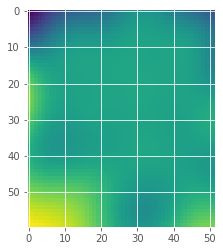

In [104]:
z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

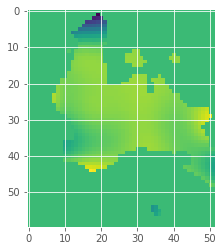

In [105]:
plt.imshow((nonsat>0)*z)

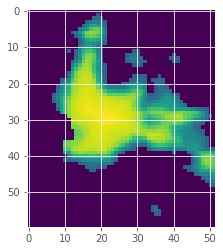

In [106]:
plt.imshow(nonsat)

In [111]:
ss[30][22]

0.011069917364196158

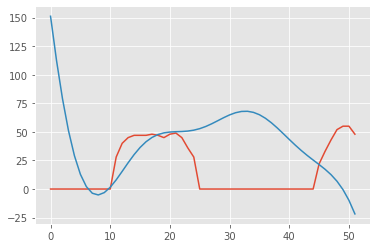

In [113]:
plt.plot(nonsat[40][:])
plt.plot(z[40][:])

In [96]:
coords_nonsat

array([[ 6, 17],
       [11, 11],
       [13, 29],
       [13, 40],
       [14, 16],
       [18, 17],
       [19, 14],
       [20, 36],
       [21, 15],
       [22, 17],
       [23, 15],
       [24, 18],
       [24, 20],
       [24, 22],
       [26, 18],
       [27, 12],
       [27, 16],
       [28, 19],
       [28, 34],
       [28, 36],
       [29, 24],
       [29, 41],
       [30, 13],
       [30, 15],
       [30, 22],
       [32, 28],
       [34, 18],
       [34, 20],
       [34, 34],
       [36, 12],
       [36, 15],
       [37, 23],
       [38, 13],
       [38, 18],
       [38, 45],
       [39, 21],
       [41, 50],
       [55, 35]])